In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
data_path = '../BindingDB_All.tsv'

In [35]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message=".*Specify dtype option on import or set low_memory=False.*")
    df = pd.read_csv(data_path, sep='\t', on_bad_lines='skip');
df.head()

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our study focuses on the impact of certain mutations and certain parts of protein sequences and try to understand the impact on binding affinity. We will thus retain certain features to have a more neat data file:
- the id of the interaction in BindingDB
- the Ligand SMILES
- the protein target Name
- the protein target chain sequence
- the entry name of the target chain in UniProt (SwissProt)
- binding affinity features

We first looked at how well defined binding affinity metrics are in BindingDB:

In [36]:
bindind_affinity_covariates = ['Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)', 'kon (M-1-s-1)', 'koff (s-1)']
for c in bindind_affinity_covariates:
    print(f"Missing {c} values rate: {df[[c]].isna().sum().values/len(df[[c]])}")

Missing Ki (nM) values rate: [0.79742492]
Missing IC50 (nM) values rate: [0.33105142]
Missing Kd (nM) values rate: [0.96203274]
Missing EC50 (nM) values rate: [0.9084931]
Missing kon (M-1-s-1) values rate: [0.99965635]
Missing koff (s-1) values rate: [0.99966318]


There are a lot of missing values and to retain as much data as possible, we have decided to focus on IC50 (nM) values since it is the most available one.

In [37]:
target_names = ['UniProt (SwissProt) Entry Name of Target Chain.{}'.format(i) for i in range(1,13)]
for t in target_names: 
    print(f"Missing values rate for {t}: ", df[[t]].isna().sum().values/len(df[[t]]))

Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.1:  [0.94722317]
Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.2:  [0.98783376]
Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.3:  [0.9947492]
Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.4:  [0.99709773]
Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.5:  [0.99866125]
Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.6:  [0.99893864]
Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.7:  [0.99893966]
Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.8:  [0.99895674]
Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.9:  [0.99917195]
Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.10:  [0.99917263]
Missing values rate for UniProt (SwissProt) Entry Name of Target Chain.11:  [0.99999009]
Missing values rate for UniProt

Most proteins are composed of only one target chain. We have decided to focus on those as well because any analysis including other chains would lack data.

In [38]:
df = df[df[target_names].isna().all(axis=1)]
useful_cols = ['BindingDB Reactant_set_id', 'Ligand SMILES', 'Target Name', 'IC50 (nM)', 
'BindingDB Target Chain Sequence', 'UniProt (SwissProt) Entry Name of Target Chain']
df = df[useful_cols]
df.set_index('BindingDB Reactant_set_id', inplace=True)
df.head()

,Ligand SMILES,Target Name,IC50 (nM),BindingDB Target Chain Sequence,UniProt (SwissProt) Entry Name of Target Chain
BindingDB Reactant_set_id,,,,,
1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,Dimer of Gag-Pol polyprotein [501-599],NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,Dimer of Gag-Pol polyprotein [501-599],NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,Dimer of Gag-Pol polyprotein [501-599],NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,Dimer of Gag-Pol polyprotein [501-599],NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,Dimer of Gag-Pol polyprotein [501-599],NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR


In [39]:
df['IC50 (nM)'].value_counts()

IC50 (nM)
>10000      60607
<100        49049
>100000     34974
 550        22160
>1000       21226
            ...  
 813.4          1
 51996.7        1
 903.3          1
 17257          1
 30750          1
Name: count, Length: 58356, dtype: int64

As we can see, there are many ways IC50 values are stored in this database. Not all of them can be compared.

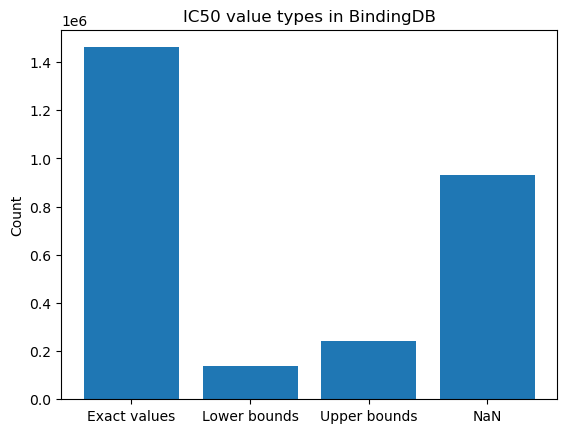

In [40]:
upper_bound_ic50_values = df[df['IC50 (nM)'].apply(lambda x: type(x)==str and '>' in x)]
lower_bound_ic50_values = df[df['IC50 (nM)'].apply(lambda x: type(x)==str and '<' in x)]
nan_ic50_values = df[df['IC50 (nM)'].isna()]
number_of_exact_ic50_values = len(df)-len(upper_bound_ic50_values)-len(lower_bound_ic50_values)-len(nan_ic50_values)
names = ['Exact values', 'Lower bounds', 'Upper bounds', 'NaN']
vals = [number_of_exact_ic50_values, len(lower_bound_ic50_values), len(upper_bound_ic50_values), len(nan_ic50_values)]
plt.bar(names, vals)
plt.ylabel('Count')
plt.title('IC50 value types in BindingDB');

We obviously have to drop rows with NaN IC50 values. This analysis also shows us that most entries have an exact IC50 values and it is thus valid to focus on those. 

In [41]:
def filter_out_comparator(s):
    if type(s)==str and ('>' in s or '<' in s):
        return False
    else:
        return True

clean_df = df.copy()
clean_df = clean_df[clean_df['IC50 (nM)'].apply(filter_out_comparator)]
clean_df['IC50 (nM)'] = pd.to_numeric(clean_df['IC50 (nM)'], errors='coerce')
clean_df = clean_df.dropna(subset=['IC50 (nM)'])
clean_df.head()

,Ligand SMILES,Target Name,IC50 (nM),BindingDB Target Chain Sequence,UniProt (SwissProt) Entry Name of Target Chain
BindingDB Reactant_set_id,,,,,
145,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,Galactokinase,6676.9,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,GALK1_HUMAN
181,CC(C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)[C@@...,Dimer of Gag-Pol polyprotein [489-587],8.5,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
182,CCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1)[...,Dimer of Gag-Pol polyprotein [489-587],177.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
184,COCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1...,Dimer of Gag-Pol polyprotein [489-587],164.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
185,COCCOCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccc...,Dimer of Gag-Pol polyprotein [489-587],67.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5


In [44]:
clean_df

,Ligand SMILES,Target Name,IC50 (nM),BindingDB Target Chain Sequence,UniProt (SwissProt) Entry Name of Target Chain
BindingDB Reactant_set_id,,,,,
145,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,Galactokinase,6676.9,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,GALK1_HUMAN
181,CC(C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)[C@@...,Dimer of Gag-Pol polyprotein [489-587],8.5,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
182,CCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1)[...,Dimer of Gag-Pol polyprotein [489-587],177.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
184,COCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1...,Dimer of Gag-Pol polyprotein [489-587],164.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
185,COCCOCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccc...,Dimer of Gag-Pol polyprotein [489-587],67.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
...,...,...,...,...,...
51530851,O[C@@H]1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(C...,BDNF/NT-3 growth factors receptor,90.0,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,NTRK2_HUMAN
51530852,O[C@H]1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(Cc...,BDNF/NT-3 growth factors receptor,118.0,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,NTRK2_HUMAN
51530895,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,Potassium voltage-gated channel subfamily H me...,1600.0,MPVRRGHVAPQNTFLDTIIRKFEGQSRKFIIANARVENCAVIYCND...,KCNH2_HUMAN


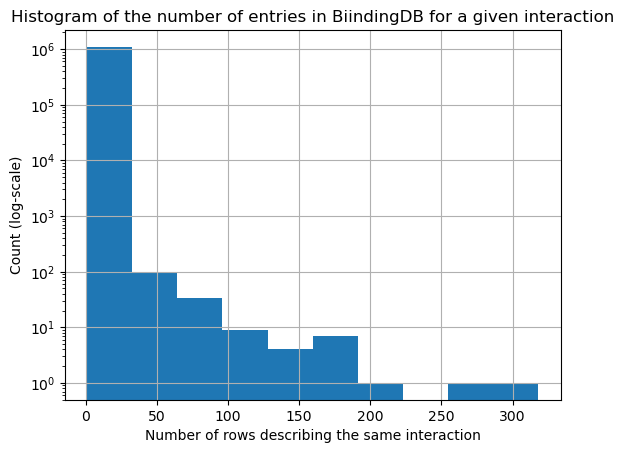

In [42]:
grouped_by_interactions = clean_df.groupby(['Ligand SMILES', 'Target Name', 'BindingDB Target Chain Sequence', 'UniProt (SwissProt) Entry Name of Target Chain'])['IC50 (nM)'].count().reset_index()
grouped_by_interactions['IC50 (nM)'].hist(log=True)
plt.title('Histogram of the number of entries in BiindingDB for a given interaction')
plt.xlabel('Number of rows describing the same interaction')
plt.ylabel('Count (log-scale)');

This plot shows us that some interactions have multiple entries in BindingDB. We thus need to merge the values to have only one entry per interaction. To have a robust merged value, we have decided to use the median which is less sensitive to outliers compared to the mean. 
Once this is done, we save this dataframe into a csv file which contains all the processed data.

In [43]:
merged_df = clean_df.groupby(['Ligand SMILES', 'Target Name', 'BindingDB Target Chain Sequence', 'UniProt (SwissProt) Entry Name of Target Chain'])['IC50 (nM)'].median().reset_index()
merged_df.to_csv('merged_df_24_11_09_only_exact_values.csv')
merged_df.head()

,Ligand SMILES,Target Name,BindingDB Target Chain Sequence,UniProt (SwissProt) Entry Name of Target Chain,IC50 (nM)
0,B.CP(c1ccccc1)c1ccc(O)cc1,Estrogen receptor,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,ESR1_HUMAN,9800.0
1,B.CP(c1ccccc1)c1ccc(O)cc1,Estrogen receptor beta,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,ESR2_HUMAN,2500.0
2,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,Estrogen receptor,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,ESR1_HUMAN,12000.0
3,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,Estrogen receptor beta,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,ESR2_HUMAN,2000.0
4,B[P@@]1(=O)OC[C@H]2O[C@H]([C@@H](F)C2O[P@@](B)...,Stimulator of interferon genes protein [140-379],APAEISAVCEKGNFNVAHGLAWSYYIGYLRLILPELQARIRTYNQH...,STING_HUMAN,5470.0


Some parts of our study focuses only in mutants and we thus will process the data further to store this information in another file. 
First, we look at the distribution of the number of mutants for a given ligand and a given wild-type (WT) protein.
In BindingDB, two mutants will share the same 'UniProt (SwissProt) Entry Name of Target Chain' value but the 'Target Name' value will be different and indicate the type and location of mutations.

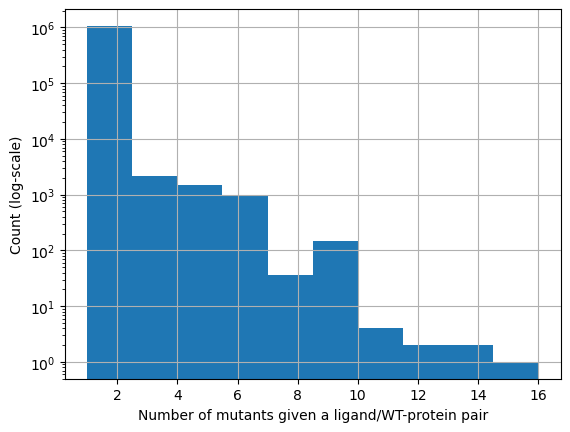

In [49]:
merged_df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain']).count().reset_index()['Target Name'].hist(log=True)
plt.xlabel('Number of mutants given a ligand/WT-protein pair')
plt.ylabel('Count (log-scale)');

This histogram shows that most entries correspond to an interaction between a given ligand A and a given WT protein B where no mutants of B were tested against A. We thus have to filter out these interaction to focus on groups that have at least 2 values (the WT protein and a mutant)

In [50]:
filtered_df = merged_df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain']).filter(lambda x: len(x) >= 2)
mutants_filtered_df = filtered_df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain'])['Target Name'].apply(list).reset_index()
mutants_filtered_df.to_csv('mutants_24_11_09_only_exact_values.csv')
mutants_filtered_df.head()

,Ligand SMILES,UniProt (SwissProt) Entry Name of Target Chain,Target Name
0,Brc1cc(CN2CCC(CC2)N2CC(CC#N)(C2)n2cc(cn2)-c2nc...,JAK2_HUMAN,"[Tyrosine-protein kinase JAK2 [828-1132], Tyro..."
1,Brc1cc(CN2CCC(CC2)N2CC(CC#N)(C2)n2cc(cn2)-c2nc...,JAK2_HUMAN,"[Tyrosine-protein kinase JAK2 [828-1132], Tyro..."
2,Brc1ccc(\C=C\CNCCOc2cncc(\C=C\c3ccncc3)c2)cc1,AKT1_HUMAN,"[RAC-alpha serine/threonine-protein kinase, RA..."
3,Brc1ccc2OCc3noc(=O)n3-c2c1,PVDQ_PSEAE,"[Acyl-homoserine lactone acylase PvdQ, Acyl-ho..."
4,Brc1ccc2n(CC(=O)NC3CN(C3)C(=O)C=C)cc(C(=O)N3CC...,RASK_HUMAN,"[GTPase KRas, GTPase KRas [1-169,G12C,C118A]]"
